Vorbereitung:

In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time
import pandas as pd

saving_plots = False

Daten einlesen:

In [2]:
# propst = np.load('saved_data/schauen/' + '18060_1props_t id=' +'.npy')
props = np.load('saved_data/' + '18090_1_props_t' +'.npy')

offs = np.load('saved_data/' + '18090_1_offsprings' +'.npy')
# tend = len(propst)
# time = range(0, tend)
# maxlab = len(propst[0]['num_off'])-1

# print('maxlab ist ', maxlab)
# print('Zeitschritte bis Homogenität ', tend-1)

Entropien vergleichen:

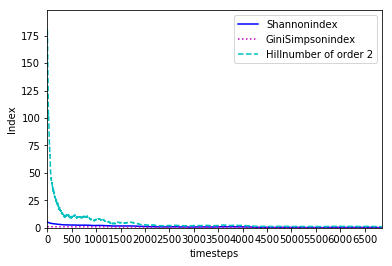

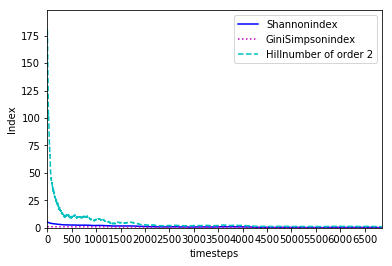

In [3]:
# %matplotlib notebook
plot_sh_gi_hh(offs, save=saving_plots, off=True)
plot_sh_gi_hh(props, save=saving_plots)

Entwicklung Populationsgröße:

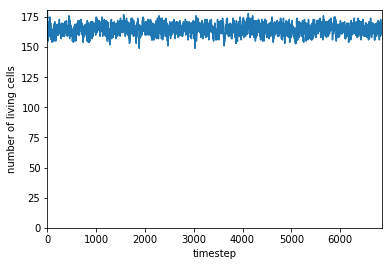

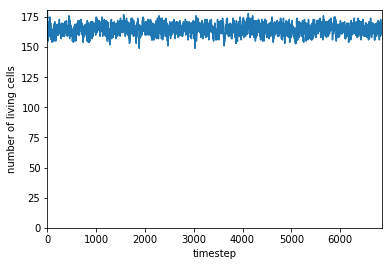

In [4]:
# %matplotlib notebook
plot_popsize(props, save=saving_plots)
plot_popsize(offs, save=saving_plots, off=True)

Mullerplot erstellen:

<IPython.core.display.Javascript object>


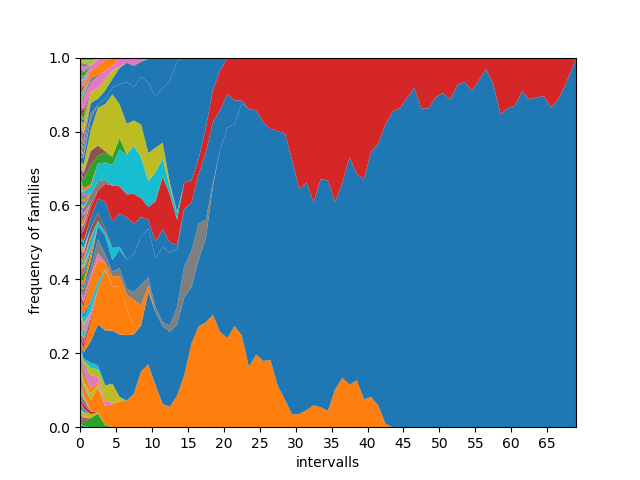

In [7]:
%matplotlib notebook
# mullerplot(propst, save=saving_plots)
mullerplot_extended(props, int_range=100, zusatz=True)

<IPython.core.display.Javascript object>


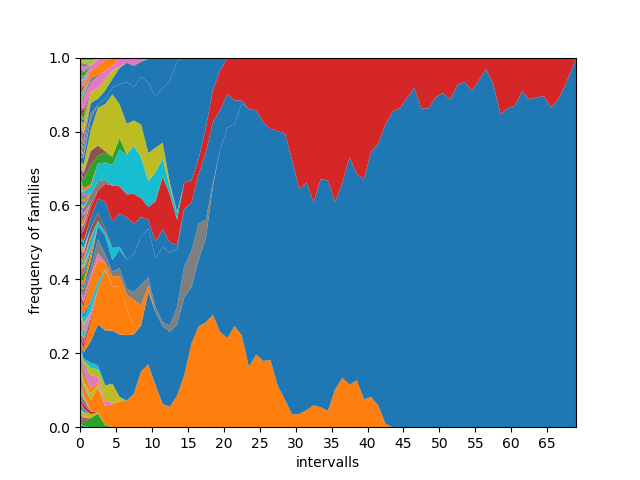

In [6]:
%matplotlib notebook
mullerplot_extended(offs, int_range=100, zusatz=True, off=True)